In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.externals import joblib

In [2]:
# Importing the dataset
dataset = pd.read_csv('../../data/engine_data_error_egt.csv')
X = dataset.iloc[:, 1:9]
y = dataset.iloc[:, [16]]

In [3]:
# Splitting the dataset manually
X_train = X.iloc[0:4500, :]
X_test = X.iloc[4500:6000, :]

y_train = y.iloc[0:4500, :].values
y_test = y.iloc[4500:6000, :].values

In [4]:
# Encoding categorical data
X_train_encode = X_train.values
X_test_encode = X_test.values

labelencoder_X_train = LabelEncoder()
X_train_encode[:, 0] = labelencoder_X_train.fit_transform(X_train_encode[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X_train_encode = onehotencoder.fit_transform(X_train_encode).toarray()

labelencoder_X_test = LabelEncoder()
X_test_encode[:, 0] = labelencoder_X_test.fit_transform(X_test_encode[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X_test_encode = onehotencoder.fit_transform(X_test_encode).toarray()

In [5]:
# Avoiding dummy variable trap
categories = [0]
dummies = []
dummies_sum = 0

for category in categories:
    dummies_sum += (dataset.iloc[:, category].unique().size) * category
    dummies.append(dummies_sum)

X_train_encode = np.delete(X_train_encode, dummies, 1)
X_test_encode = np.delete(X_test_encode, dummies, 1)

In [6]:
# Fitting Multiple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_encode, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# Predicting the Test Set results
y_pred = regressor.predict(X_test_encode)
y_pred[y_pred > 100] = 100
y_pred = y_pred.ravel()
y_p = np.abs(y_pred) / 100

In [8]:
dataset[dataset['normal'] == False].head()

,engine,month,air_temp,noise,epr,egt,ff,n1,n2,noise_n,epr_n,egt_n,ff_n,n1_n,n2_n,normal,failure_prob
13,1,14,-10,132,49,1753,5125,12462,10467,True,True,False,True,True,True,False,3
14,1,15,-5,133,49,1760,5132,12506,10516,True,True,False,True,True,True,False,6
15,1,16,-9,133,48,1767,5138,12558,10529,True,True,False,True,True,True,False,9
16,1,17,-1,133,48,1784,5145,12594,10582,True,True,False,True,True,True,False,12
17,1,18,-11,133,50,1788,5158,12628,10623,True,True,False,True,True,True,False,15


In [9]:
engine1 = dataset[dataset['engine'] == 1]

In [10]:
#Final Output
normal_false = engine1[engine1['normal'] == False]
normal_false

,engine,month,air_temp,noise,epr,egt,ff,n1,n2,noise_n,epr_n,egt_n,ff_n,n1_n,n2_n,normal,failure_prob
13,1,14,-10,132,49,1753,5125,12462,10467,True,True,False,True,True,True,False,3
14,1,15,-5,133,49,1760,5132,12506,10516,True,True,False,True,True,True,False,6
15,1,16,-9,133,48,1767,5138,12558,10529,True,True,False,True,True,True,False,9
16,1,17,-1,133,48,1784,5145,12594,10582,True,True,False,True,True,True,False,12
17,1,18,-11,133,50,1788,5158,12628,10623,True,True,False,True,True,True,False,15
18,1,19,-12,133,49,1800,5166,12650,10635,True,True,False,True,True,True,False,18
19,1,20,-5,134,49,1811,5178,12684,10676,True,True,False,True,True,True,False,21
20,1,21,-15,134,50,1826,5183,12700,10721,True,True,False,True,True,True,False,24
21,1,22,-14,134,49,1832,5192,12742,10750,True,True,False,True,True,True,False,27
22,1,23,-7,134,50,1850,5204,12782,10773,True,True,False,True,True,True,False,30


In [11]:
failure_start = normal_false.head(1)
failure_final = normal_false[normal_false['failure_prob'] == 100].head(1)

In [12]:
all_normal_columns = normal_false[['noise_n', 'epr_n', 'egt_n', 'ff_n', 'n1_n', 'n2_n']].columns
all_normal_columns = list(all_normal_columns.values)
cols = normal_false[all_normal_columns].columns[(normal_false[all_normal_columns] == False).iloc[0]]


In [22]:
failures_start = []
failures_start.append(failure_start[[list(cols)[0][:-2], 'month']])

failures_start


[     egt  month
 13  1753     14]

In [14]:
failures_final = []
for i in list(cols):
    print(i, failure_final[i[:-2]])
    failures_final.append(failure_final[[list(cols)[0][:-2], 'month']])
    
failures_final

egt_n 46    2111
Name: egt, dtype: int64


[     egt  month
 46  2111     47]

In [20]:
normal_dataset = pd.read_csv('../../data/engine_data_normal.csv')
y_normal = normal_dataset.iloc[:, [16]]
normal_failure = normal_dataset[normal_dataset['failure_prob'] == 100].head(1)
normal_failure

,engine,month,air_temp,noise,epr,egt,ff,n1,n2,noise_n,epr_n,egt_n,ff_n,n1_n,n2_n,normal,failure_prob
58,1,59,-9,141,50,1947,5525,14039,12060,False,True,False,False,False,False,False,100


In [16]:
normal_failure_month = normal_failure['month'].values[0]
normal_failure_month

59

In [17]:
print("The engine should have lasted " + str(normal_failure_month) + " months. But it will last only " + str(failures_final[0]['month'].values[0]) + " months as the EGT crossed the limit on " + str(failures_start[0]['month'].values[0]) + " month.")


The engine should have lasted 59 months. But it will last only 47 months as the EGT crossed the limit on 14 month.


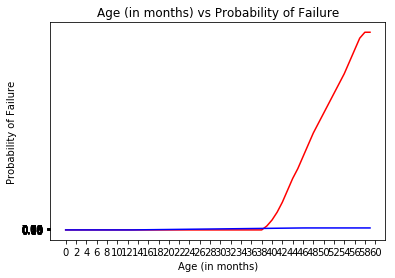

In [21]:
# Visualising the results

# First Observation
plt.plot(X_test['month'][0:60], y_normal, color = 'red')
plt.plot(X_test['month'][0:60], y_p[0:60], color = 'blue')
plt.xticks(np.arange(0, 61, 2))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.title('Age (in months) vs Probability of Failure')
plt.xlabel('Age (in months)')
plt.ylabel('Probability of Failure')
plt.show()

In [19]:
y_p

array([3.80741531e-05, 4.12928390e-05, 3.12176656e-04, ...,
       9.99484794e-01, 9.99807149e-01, 9.99903918e-01])